In [1]:
import numpy as np
import math
#""" Clase que representa la capa de un perceptron sigmoide"""
class Perceptron: 
    def __init__(self):
        self.pesos= [] # """Arreglo donde se guardan los pesos"""
        self.datos=[]  #""" Arreglo donde se guardan los inputs"""
        self.b=0  #"""Este valor representa el bais"""
        self.out=0 #""" Este valor represente el output del sigmoide"""
        self.error=0 #""" El error """
        self.delta=0  #""" El delta"""
        self.lr=0.1 #""" El learning rata"""
        self.bout=0  # """Este valor represente en binario el output, por si se necesita"""
    
   # """ Método para agregar el learning rate"""
    def agregarlr(self,valor):
        self.lr=valor
    #""" Agregar pesos"""
    def agregarpeso(self,peso):
        self.pesos.append(peso)
    #""" Agregar los inputs"""    
    def agregardato(self,dato):
        self.datos.append(dato)
    #""" Agregar bais"""    
    def agregarbais(self,bais):
        self.b=bais
     #"""Agregar erro, este se utiliza si este perectron está en la última capa """"
      #   """ya que aquí el erro es la resta del output con el output esperado """   
    def agregarerror(self,valor):
        self.error=valor
   # """ Calcular el output del sigmoide, ya debe estar ingresados lo datos y los pesos"""
    def run(self):
        ps=np.array(self.pesos)
        dt=np.array(self.datos)
        x= ps*dt
        suma=x.sum()
        exponente = -1*(suma+self.b)
        denominador = 1 + np.exp(exponente)
        self.out=1/denominador
        if self.out>=0.5: #"""Criterio para calcular el output binario"""
            self.bout=1
        else:
            self.bout=0
    #"""Agregar datos"""
    def agregardatos(self,dats):
        self.datos=dats
     #"""Vaciar datos"""   
    def vaciardatos(self):
        self.datos=[]
        
    #"""Calcular error, ingresando los delta de la capa siguiente"""
    def calcularerror(self,deltasnextcapa,pesosnextcapa):
        ps=np.array(pesosnextcapa)
        delt=np.array(deltasnextcapa)
        
        mult=ps*delt
        self.error=mult.sum()
    #"""Calcular del delta"""    
    def calculardelta(self):
        self.delta=self.error*(self.out*(1-self.out))
    
    #Despues de tener el delta se realiza el ajuste de los pesos, este se usa
    #para el paso 3 de la backpropagation. 
    def ajustarpesos(self):
        nuevospesos=[]
        x=0
        for peso in self.pesos:
            nuevospesos.append(peso+(self.lr*self.delta*self.datos[x]))
            x=x+1
        self.pesos=nuevospesos
        self.b=self.b + self.lr*self.delta    

In [2]:
class Capa:
    #"""Clase que representa una capa de red neuronal"""
    def __init__(self):
        self.perceptrones=[] #"""Arreglo con los pereceptrones"""
        self.input=[] #"""Inputs que se le pasaran a  los pereceptrones """
        self.output=[] # """Outputs que regresaran los perceptrones"""
        self.deltas=[]  #"""Deltas de cada uno de los perceptrones """
        self.siguientecapa = None # """Siguiente capa"""
        self.anteriorcapa =None  # """Capa anterior"""
        self.boutput=[]
        self.pesos=[]  #Arreglo que guarda los pesos de cada perceptron, arreglo de arreglos
    def getnextcapa(self, capa):
        self.siguientecapa = capa
    
    def getpreviouscapa(self,capa):
        self.anteriorcapa = capa
   # """Agregar inputs"""
    def getinput(self,datos):
        self.input=datos
    # Agregar perceptron individual
    def getperceptron(self, perceptron):
        self.perceptrones.append(perceptron)
        self.pesos.append(perceptron.pesos)
   
    #Cargar los pesos de los perceptrones
    def cargarpesos(self):
        pesos=[]
        for per in self.perceptrones:
            pesos.append(per.pesos)
        self.pesos=pesos
    # Agregar perceptrones arreglo     
    def getperceptrones(self, arreglo):
        self.perceptrones=arreglo
        pesos=[]
        for per in arreglo:
            pesos.append(per.pesos)
        self.pesos=pesos
        
   #"""Recorrido para calcular output """
    def Feeding(self):
        self.output=[]
        self.boutput=[]
        for perc in self.perceptrones: #"""Cada perceptron recibe los datos y su respuestas son cargadas al outputs"""
            perc.agregardatos(self.input)
            perc.run()
            self.output.append(perc.out)
            self.boutput.append(perc.bout)
        if self.siguientecapa != None: #"""Si no es la última capa, se pasá mi output como input de la siguiente capa"""
            self.siguientecapa.getinput(self.output)
            self.siguientecapa.Feeding()
    
   #Método backprogation para la última cap, recibe un arreglo con los output esperados

    def backpropagation(self, expectoutput):
        self.deltas=[] #Vaciamo los deltas
        x=0
        for perc in self.perceptrones:
            perc.agregarerror(expectoutput[x]-perc.out)# """Cada pereceptron recibe su error"""
            perc.calculardelta()#"""Cada perceptron calcula su delta"""
            self.deltas.append(perc.delta) #"""Se agregan a los delta de la capaa """
            x=x+1
        self.anteriorcapa.backpropagation1(self.deltas,self.pesos) #Backpropagation para otreas capas. 
        #Despues se propaga el error, comenzamos a ajustar los pesos.
        for perc in self.perceptrones:
            perc.ajustarpesos()
        self.cargarpesos()
    #Métod backpropagation para capas distan a las final,recibe los deltas y pesos de la sigueinte capa.     
    def backpropagation1(self,deltas,pesos):
        self.deltas=[] #Vaciamos los deltas
        x=0
        for perc in self.perceptrones:
            pecorres=[] #Pesos correspondientes para un perceptron específico
            for pp in pesos: #pp es un arreglo con los pesos de un perceptron de la capa siguiente
                pecorres=pp[x]     #Sacamos nuestro peso correspondiente de ese perceotron
            perc.calcularerror(deltas,pecorres) # El perecptron calcula el erro
            perc.calculardelta() # El perceptron calcula el delta.
            self.deltas.append(perc.delta) #Agregamos el delta al arreglo de la capa
            x=x+1
        if(self.anteriorcapa==None): #Si es la primera capa, detemos la propagación
            for perc in self.perceptrones: 
                perc.ajustarpesos() # Paso 3 de el backpropagation, ajustamos los pesos
            self.cargarpesos() #Cargamos lo pesos al arreglo de la capa
        else:
            self.anteriorcapa.backpropagation1(self.deltas,self.pesos) #Seguimos con la propagación
            for perc in self.perceptrones:
                perc.ajustarpesos() #Al terminar la propagación ajustamos los pesos.
            self.cargarpesos()
        
        

In [3]:
import random
class Fabrica:
    def __init__(self):
        self.lr=0.1 #learning range con el que se crearn los perceptrones
        self.bais=-1 #bais con el que se crearan los peceptrones
        
    def getlr(self,valor):
        self.lr=valor
        
    def getbais(self,valor):
        self.bais=valor
    #Método que crea un perecpetron con cantidad especifica de pesos   
    def crearPerceptron(self,cantPesos):
        per= Perceptron()
        for x in range(cantPesos):
            per.agregarpeso(random.uniform(-2,2))
        per.agregarlr(self.lr)
        per.agregarbais(self.bais)
        return per
    #Método que crea una capa con una cantidad especifica de perceptrones y pesos.
    def crearCapa(self, cantPer, cantPesos):
        cap= Capa()
        for x in range(cantPer):
            cap.getperceptron(self.crearPerceptron(cantPesos))
        return cap    
    
    

In [4]:
class Red_Neuronal:
    def __init__(self):
        self.capinicial=None #Capa inicial 
        self.capintemedias=[] #Arreglo donde se guardaran las capas intemedias, deben ser ingresadas en orden.
        self.capfinal=None
    #Se agrega la capa incial a la red neuronal, se asume que esta tiene los perceptrones y pesos correctos.
    def getcapinicial(self,capa):
        self.capinicial=capa
    #Agregar capa final.
    def getcapfinal(self, capa):
        self.capfinal= capa
    #Agregar una capa intemedia, se debe agregar en orden
    def getcapaintermedia(self, capa):
        self.capintemedias.append(capa)
    #Método para que cada capa reciba su capa anterior y su capa siguiente    
    def enlazar(self):
        if len(self.capintemedias)==0: #Si no hay capas intermedias
            self.capinicial.getnextcapa(self.capfinal)   #Se enlazan la primera con la última
            self.capfinal.getpreviouscapa(self.capinicial)
        else:  #Si hay capas intemedias
            x=0
            self.capinicial.getnextcapa(self.capintemedias[x]) #Se enlaza la capa inicial, con la primera capa del arreglo
            while x<(len(self.capintemedias)-1):
                self.capintemedias[x].getnextcapa(self.capintemedias[x+1]) #Se enlaza cada capa, con su siguiente
                x=x+1
            x=len(self.capintemedias)-1
            while x>0:
                self.capintemedias[x].getpreviouscapa(self.capintemedias[x-1])#Se enlaza cada capa, con la anterior
                x=x-1
            x=len(self.capintemedias)-1
            self.capfinal.getpreviouscapa(self.capintemedias[x]) #Se enlza la  útima capa del arrglo, con la capa final
            self.capintemedias[x].getnextcapa(self.capfinal)
    
    def comparador(self,conjunto1,conjunto2):
        x=1
        i=0
        for z in conjunto1:
            if(z!=conjunto2[i]):
                x=0
                return x
            i=i+1
        return x
    
    #Método para entrenar, devuelve los errores
    def entrenar(self,settrain,num, settest):
        inputrain=settrain[0]
        outputtrain=settrain[1]
        inputtest=settest[0]
        outputtest=settest[1]
        intentos=[]
        resultados=[]
        
        for x in range(num):
            i=0
            for tupla in inputrain:
                self.capinicial.getinput(tupla)
                self.capinicial.Feeding()
                self.capfinal.backpropagation(outputtrain[i])
                i=i+1
            i=0
            errores=0
            for tupla in inputtest:
                self.capinicial.getinput(tupla)
                self.capinicial.Feeding()
                if self.comparador(self.capfinal.boutput,outputtest[i])==0:
                    errores=errores+1
                i=i+1
            resultados.append(errores)
            intentos.append(x+1)
        return [intentos,resultados]

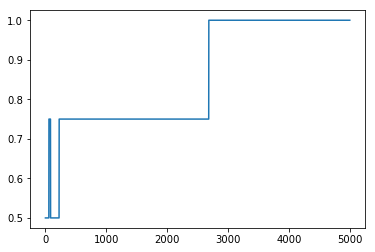

In [5]:
from matplotlib import pyplot
fabri = Fabrica()
capa1 = fabri.crearCapa(2,2)
capa3 = fabri.crearCapa(1,2)

red1= Red_Neuronal()
red1.getcapinicial(capa1)
red1.getcapfinal(capa3)
red1.enlazar()

entrada=[[0,0],[0,1],[1,0],[1,1]]
salida = [[0],[1],[1],[0]]
entre=[entrada,salida]

a = red1.entrenar(entre,5000,entre)
b=[]
for x in a[1]:
    b.append((4-x)/4)
pyplot.plot(a[0],b)
pyplot.show()

In [7]:
capa1.getinput([1,1])
capa1.Feeding()
print(capa3.output)

[0.071893062469609498]


In [6]:
 import pandas as pd
 df1=pd.read_csv("merge.csv") #Cargamos datos
 cnt = df1.count() #Conteo de tuplas 
 print (cnt)

OCNTY        40057
OCNTYPOP     40057
BFACIL3      40057
MAGER14      40057
MAGER9       40057
MRACEHISP    40057
MAR          40057
MEDUC        40057
APGAR5       40057
APGAR5R      40057
SEX          40057
dtype: int64


In [7]:
df1['APGAR5'].value_counts()

8     14026
9     10031
10     9644
15     5171
99     1185
Name: APGAR5, dtype: int64

In [7]:
new_map2={'M':0,'F':1} #Cambiamos sexo por un valor númerico 
df2= df1.copy()
df2["SEX"]=df2["SEX"].map(new_map2)
df2['SEX'].value_counts()

0    21022
1    19035
Name: SEX, dtype: int64

In [8]:
df3=df2[(df2['APGAR5'] != 99)] #No tomamos los casos 99: no se determino el apgar, o no se sabe.
df4=df3[(df3['OCNTY'] != 999)]
df4['BFACIL3'].value_counts()


1    28311
3      121
2       39
Name: BFACIL3, dtype: int64

In [11]:
from sklearn import preprocessing
x = df4.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df4.count())
print(df.count())

OCNTY        28471
OCNTYPOP     28471
BFACIL3      28471
MAGER14      28471
MAGER9       28471
MRACEHISP    28471
MAR          28471
MEDUC        28471
APGAR5       28471
APGAR5R      28471
SEX          28471
dtype: int64
0     28471
1     28471
2     28471
3     28471
4     28471
5     28471
6     28471
7     28471
8     28471
9     28471
10    28471
dtype: int64


/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [10]:
X= df.drop(labels=[8,9],axis=1) #Quitamos los campos objetivos de nuestra predicción
Y=  df4.APGAR5


NameError: name 'df' is not defined

In [14]:
from sklearn.model_selection import train_test_split
X= df.drop(labels=[8,9],axis=1) #Quitamos los campos objetivos de nuestra predicción
Y= df4.APGAR5 # Objetivos de nuestra predicción

#Sacamos un catidad de datos para testia, y otra para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y) 

xtrain=[] #Formato que acepta nuestra red, listas
xtest=[] 
for index, row in X_train.iterrows() : #iteramos fila a fila
    tupla=[] #
    tupla.append(row[0]) #Agregamos cada uno de los campos.
    tupla.append(row[1])
    tupla.append(row[2])
    tupla.append(row[3])
    tupla.append(row[4])
    tupla.append(row[5])
    tupla.append(row[6])
    tupla.append(row[7])
    tupla.append(row[10])
    xtrain.append(tupla)
    
for index, row in X_test.iterrows() :
    tupla=[] #
    tupla.append(row[0]) #Agregamos cada uno de los campos.
    tupla.append(row[1])
    tupla.append(row[2])
    tupla.append(row[3])
    tupla.append(row[4])
    tupla.append(row[5])
    tupla.append(row[6])
    tupla.append(row[7])
    tupla.append(row[10])
    xtest.append(tupla)
    

print(xtrain[100], xtest[100])

[0.86792452830188671, 1.0, 0.0, 0.69230769230769229, 0.5, 0.125, 1.0, 0.625, 1.0] [0.99999999999999989, 0.0, 0.0, 0.53846153846153855, 0.25, 0.125, 1.0, 0.375, 1.0]


In [15]:
yarreglo=y_train.get_values() #Este solo es un arreglo con los apgar de cada fila correspondiente en el arreglo xtrain.
ytrain=[]
for x in yarreglo: 
    if x==8: # Nuestro  out correspondiete, 4 percetrones en la capa final.
        ytrain.append([1,0,0,0])
    if x==9:
        ytrain.append([0,1,0,0])
    if x==10:
        ytrain.append([0,0,1,0])
    if x==15:
        ytrain.append([0,0,0,1])

yarreglo=y_test.get_values()
ytest=[]
for x in yarreglo:
    if x==8:
        ytest.append([1,0,0,0])
    if x==9:
        ytest.append([0,1,0,0])
    if x==10:
        ytest.append([0,0,1,0])
    if x==15:
        ytest.append([0,0,0,1])
 

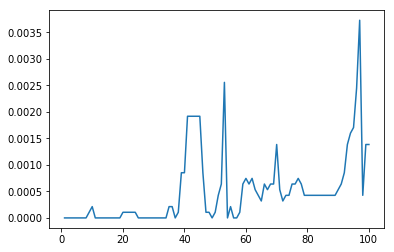

In [14]:
from matplotlib import pyplot
fabri = Fabrica()
fabri.getlr(0.8)
capa1 = fabri.crearCapa(15,9) #Capa 3 pereceptrons 9 pesos cada quien 
capa2 = fabri.crearCapa(4,15) #Capa 4 perceptrones 3 pesos cada quien

red1= Red_Neuronal() 
red1.getcapinicial(capa1) #Capa incial.
red1.getcapfinal(capa2) #Capa final
red1.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red1.entrenar(train,100,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [15]:
print(min(a[1]),l)

9361 9396


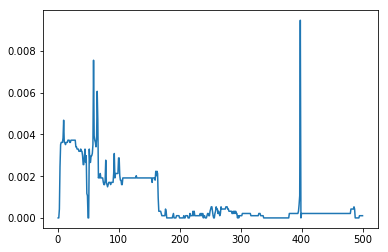

In [16]:
from matplotlib import pyplot
fabri = Fabrica()
fabri.getlr(0.8)
capa1 = fabri.crearCapa(15,9) #Capa 3 pereceptrons 9 pesos cada quien 
capa2 = fabri.crearCapa(4,15) #Capa 4 perceptrones 3 pesos cada quien

red1= Red_Neuronal() 
red1.getcapinicial(capa1) #Capa incial.
red1.getcapfinal(capa2) #Capa final
red1.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red1.entrenar(train,500,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [17]:
print(min(a[1]),l)

9307 9396


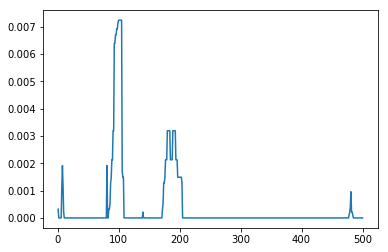

In [14]:
fabri = Fabrica()
fabri.getlr(0.3)
capa2_1 = fabri.crearCapa(10,9) #Capa 6 pereceptrons 9 pesos cada quien 
capa2_2 = fabri.crearCapa(20,10) #Capa 3 perceptrones 6 pesos cada quien
capa2_3 = fabri.crearCapa(4,20) #Capa 4 perceptrones 3 pesos 
red2= Red_Neuronal() 
red2.getcapinicial(capa2_1) #Capa incial.
red2.getcapaintermedia(capa2_2) #Capa incial.
red2.getcapfinal(capa2_3) #Capa final
red2.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red2.entrenar(train,500,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [15]:
print(min(a[1]),l)

9328 9396


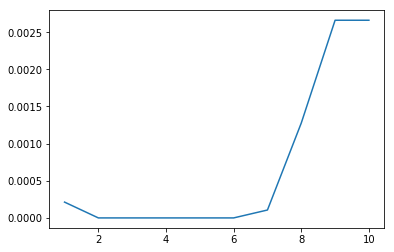

In [16]:
print(min(a[1]),l)

9371 9396


In [ ]:
fabri = Fabrica()
#fabri.getlr(0.3)
capa2_1 = fabri.crearCapa(10,9) #Capa 6 pereceptrons 9 pesos cada quien 
capa2_2 = fabri.crearCapa(100,10) #Capa 3 perceptrones 6 pesos cada quien
capa2_3 = fabri.crearCapa(4,100) #Capa 4 perceptrones 3 pesos 
red2= Red_Neuronal() 
red2.getcapinicial(capa2_1) #Capa incial.
red2.getcapaintermedia(capa2_2) #Capa incial.
red2.getcapfinal(capa2_3) #Capa final
red2.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red2.entrenar(train,100,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [9]:
ap8=df4[(df4['APGAR5'] == 8)]
ap9=df4[(df4['APGAR5'] == 9)]
ap10=df4[(df4['APGAR5'] == 10)]
ap15=df4[(df4['APGAR5'] == 15)]

ap8_3000= ap8.head(3000)
ap9_3000= ap9.head(3000)
ap10_3000= ap10.head(3000)
ap15_3000= ap15.head(3000)

npd= pd.concat([ap8_3000,ap9_3000,ap10_3000,ap15_3000],ignore_index=True)

npd['APGAR5'].value_counts()

15    3000
10    3000
9     3000
8     3000
Name: APGAR5, dtype: int64

In [10]:
from sklearn import preprocessing
x = npd.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(npd.count())
print(df.count())

OCNTY        12000
OCNTYPOP     12000
BFACIL3      12000
MAGER14      12000
MAGER9       12000
MRACEHISP    12000
MAR          12000
MEDUC        12000
APGAR5       12000
APGAR5R      12000
SEX          12000
dtype: int64
0     12000
1     12000
2     12000
3     12000
4     12000
5     12000
6     12000
7     12000
8     12000
9     12000
10    12000
dtype: int64


/home/marco/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
X= df.drop(labels=[8,9],axis=1) #Quitamos los campos objetivos de nuestra predicción
Y=  npd.APGAR5

In [12]:
from sklearn.model_selection import train_test_split
X= df.drop(labels=[8,9],axis=1) #Quitamos los campos objetivos de nuestra predicción
Y= npd.APGAR5 # Objetivos de nuestra predicción

#Sacamos un catidad de datos para testia, y otra para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=37, stratify=Y) 

xtrain=[] #Formato que acepta nuestra red, listas
xtest=[] 
for index, row in X_train.iterrows() : #iteramos fila a fila
    tupla=[] #
    tupla.append(row[0]) #Agregamos cada uno de los campos.
    tupla.append(row[1])
    tupla.append(row[2])
    tupla.append(row[3])
    tupla.append(row[4])
    tupla.append(row[5])
    tupla.append(row[6])
    tupla.append(row[7])
    tupla.append(row[10])
    xtrain.append(tupla)
    
for index, row in X_test.iterrows() :
    tupla=[] #
    tupla.append(row[0]) #Agregamos cada uno de los campos.
    tupla.append(row[1])
    tupla.append(row[2])
    tupla.append(row[3])
    tupla.append(row[4])
    tupla.append(row[5])
    tupla.append(row[6])
    tupla.append(row[7])
    tupla.append(row[10])
    xtest.append(tupla)
    

print(xtrain[100], xtest[100])

[0.094339622641509441, 1.0, 0.0, 0.61538461538461542, 0.375, 0.125, 1.0, 0.375, 1.0] [0.99999999999999989, 0.0, 0.0, 0.69230769230769229, 0.5, 0.375, 1.0, 0.625, 1.0]


In [13]:
yarreglo=y_train.get_values() #Este solo es un arreglo con los apgar de cada fila correspondiente en el arreglo xtrain.
ytrain=[]
for x in yarreglo: 
    if x==8: # Nuestro  out correspondiete, 4 percetrones en la capa final.
        ytrain.append([1,0,0,0])
    if x==9:
        ytrain.append([0,1,0,0])
    if x==10:
        ytrain.append([0,0,1,0])
    if x==15:
        ytrain.append([0,0,0,1])

yarreglo=y_test.get_values()
ytest=[]
for x in yarreglo:
    if x==8:
        ytest.append([1,0,0,0])
    if x==9:
        ytest.append([0,1,0,0])
    if x==10:
        ytest.append([0,0,1,0])
    if x==15:
        ytest.append([0,0,0,1])
 

In [14]:
print(len(ytrain),len(ytest))

8040 3960


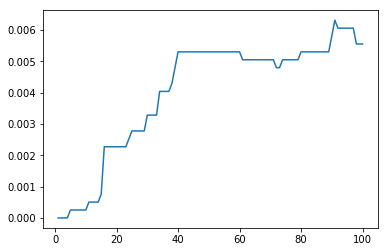

In [17]:
from matplotlib import pyplot
fabri = Fabrica()
capa1 = fabri.crearCapa(15,9) #Capa 3 pereceptrons 9 pesos cada quien 
capa2 = fabri.crearCapa(4,15) #Capa 4 perceptrones 3 pesos cada quien

red1= Red_Neuronal() 
red1.getcapinicial(capa1) #Capa incial.
red1.getcapfinal(capa2) #Capa final
red1.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red1.entrenar(train,100,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [18]:
print(min(a[1]),l)

3935 3960


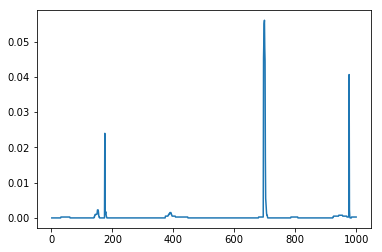

In [16]:
fabri = Fabrica()
#fabri.getlr(0.3)
capa2_1 = fabri.crearCapa(10,9) #Capa 6 pereceptrons 9 pesos cada quien 
capa2_2 = fabri.crearCapa(20,10) #Capa 3 perceptrones 6 pesos cada quien
capa2_3 = fabri.crearCapa(4,20) #Capa 4 perceptrones 3 pesos 
red2= Red_Neuronal() 
red2.getcapinicial(capa2_1) #Capa incial.
red2.getcapaintermedia(capa2_2) #Capa incial.
red2.getcapfinal(capa2_3) #Capa final
red2.enlazar()

train=[xtrain,ytrain]
test=[xtest,ytest]

a=red2.entrenar(train,1000,test)

b=[]
l= len(xtest)
for x in a[1]:
    b.append((l-x)/l)
pyplot.plot(a[0],b)
pyplot.show()

In [21]:
print(min(a[1]),l)

3909 3960
